In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.evaluation.SilhouetteScore import *
from interClusLib.evaluation.DunnIndex import *
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans
from interClusLib.metric import *

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         67.914088        71.928527        20.698588        82.384005   
1          0.428047         3.320633        45.325606        56.378644   
2          7.943709        86.518084        16.678557        65.692579   
3         65.271674        90.847954        76.172393        92.924667   
4         72.168704        89.896754        60.436120        88.635456   
5         34.808832        85.227231        54.561478        81.278722   
6          2.441453        30.443611        47.042586        52.191378   
7         66.251806        87.597275        60.331312        92.694437   
8         66.206129        66.702127         2.447809        78.431464   
9          2.645645        38.469339        31.436232        49.754193   
10        62.381730        89.936452        44.401573        93.017

In [2]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[2 3 2 1 1 2 0 1 1 3 1 2 2 2 0 2 3 2 1 0 0 2 3 2 2 0 2 0 0 0]
0.21382709219155963


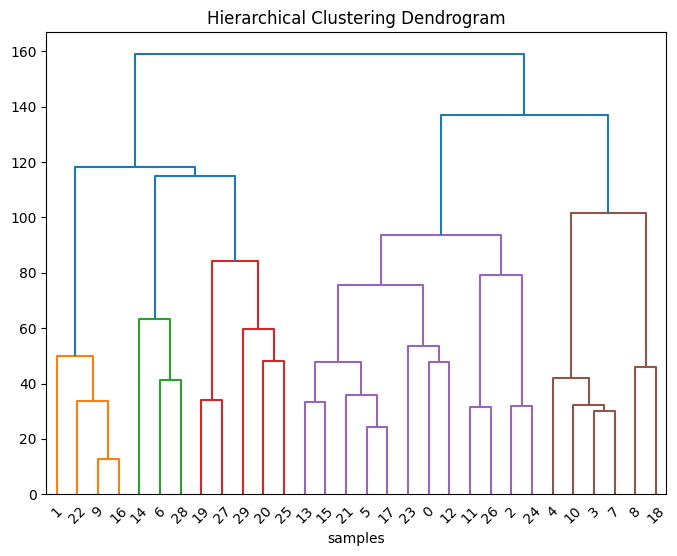

In [3]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.30496728, 0.27550312, 0.08813393, 0.33139567],
       [0.20043194, 0.6407785 , 0.11519227, 0.0435973 ],
       [0.33736036, 0.4210752 , 0.14179839, 0.09976605],
       [0.08885998, 0.03893259, 0.02849401, 0.84371342],
       [0.12232109, 0.04962622, 0.04675528, 0.7812974 ],
       [0.67855278, 0.09442567, 0.04213257, 0.18488897],
       [0.205407  , 0.34472275, 0.3846565 , 0.06521375],
       [0.07049274, 0.0276772 , 0.03183099, 0.86999907],
       [0.19253971, 0.13896318, 0.32213834, 0.34635877],
       [0.07974617, 0.84016139, 0.06309602, 0.01699643],
       [0.04484095, 0.01384813, 0.00952868, 0.93178224],
       [0.49540084, 0.26047168, 0.13165721, 0.11247027],
       [0.24611094, 0.27632778, 0.13159285, 0.34596843],
       [0.56780911, 0.218042  , 0.06421935, 0.14992954],
       [0.29685627, 0.27196849, 0.30160876, 0.12956649],
       [0.60575627, 0.25887085, 0.04619691, 0.08917596],
       [0.06218909, 0.89288332, 0.03326487, 0.01166272],
       [0.49755371, 0.10917686,

In [5]:
model.get_crisp_assignments()

print(silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))
print(dunn_index(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.17472945913828017
0.23219756241739894


In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som.topographic_error(random_data.get_intervals())


Neuron (1, 1) has these sample indices => [0, 3, 4, 5, 7, 10, 12, 13, 17, 21, 23, 26]
Neuron (0, 0) has these sample indices => [1, 6, 9, 14, 16, 19, 22, 25, 27, 28, 29]
Neuron (0, 1) has these sample indices => [2, 11, 15, 24]
Neuron (1, 0) has these sample indices => [8, 18, 20]


0.0

In [8]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [9]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som_2.topographic_error(random_data.get_intervals())

Neuron (1, 1) has these sample indices => [0, 1, 2, 9, 13, 15, 16, 22, 24]
Neuron (1, 0) has these sample indices => [3, 4, 5, 7, 10, 12, 17, 21, 23]
Neuron (0, 1) has these sample indices => [6, 14, 19, 20, 25, 27, 28, 29]
Neuron (0, 0) has these sample indices => [8, 11, 18, 26]


0.0